In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble.forest import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib notebook

In [3]:
data=np.genfromtxt('phis_data.csv',delimiter=',',dtype=np.int32)

In [4]:
inp=data[:,:-1]

In [5]:
out=data[:,-1]

In [6]:
df=pd.DataFrame(data)

In [7]:
df.columns=['having_ip','url_len','short_serv','having_@_symb','double_slash_redir','prefix_suffix','having_sub_domain','ssl_final_state','domain_reg_len','favicon','port','https_token','req_url','url_of_anchor','links_in_tags','sfh','submitting_to_email','abnormal_url','redirect','on_mouseover','right_click','pop_up','i_frame','age_of_domain','dns_record','web_traff','page_rank','google_ind','links_to_page','stat_rep','result']

In [8]:
feat=['having_ip','url_len','short_serv','having_@_symb','double_slash_redir','prefix_suffix','having_sub_domain','ssl_final_state','domain_reg_len','favicon','port','https_token','req_url','url_of_anchor','links_in_tags','sfh','submitting_to_email','abnormal_url','redirect','on_mouseover','right_click','pop_up','i_frame','age_of_domain','dns_record','web_traff','page_rank','google_ind','links_to_page','stat_rep']

In [9]:
tra_inp=inp[:8700]
tra_out=out[:8700]
tes_inp=inp[8700:]
tes_out=out[8700:]

In [10]:
df

,having_ip,url_len,short_serv,having_@_symb,double_slash_redir,prefix_suffix,having_sub_domain,ssl_final_state,domain_reg_len,favicon,...,pop_up,i_frame,age_of_domain,dns_record,web_traff,page_rank,google_ind,links_to_page,stat_rep,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [11]:
X=df[['having_ip','url_len','short_serv','having_@_symb','double_slash_redir','prefix_suffix','having_sub_domain','ssl_final_state','domain_reg_len','favicon','port','https_token','req_url','url_of_anchor','links_in_tags','sfh','submitting_to_email','abnormal_url','redirect','on_mouseover','right_click','pop_up','i_frame','age_of_domain','dns_record','web_traff','page_rank','google_ind','links_to_page','stat_rep']]

In [12]:
y=df['result']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=69)

In [14]:
classif=RandomForestClassifier(n_estimators=110)

In [15]:
classif.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred=classif.predict(X_test)

In [17]:
accur=accuracy_score(y_test,y_pred)

In [18]:
accur=accur*100


In [19]:
accur

97.13596623454929

In [20]:
impfeats=pd.Series(classif.feature_importances_,index=feat).sort_values(ascending=False)

In [21]:
impfeats

ssl_final_state        0.313431
url_of_anchor          0.242446
web_traff              0.074755
having_sub_domain      0.072513
links_in_tags          0.045121
prefix_suffix          0.040473
sfh                    0.021550
req_url                0.019246
links_to_page          0.019003
age_of_domain          0.016935
domain_reg_len         0.015717
having_ip              0.013404
google_ind             0.012575
page_rank              0.012480
dns_record             0.012045
url_len                0.008430
https_token            0.005973
redirect               0.005542
short_serv             0.005382
submitting_to_email    0.005313
having_@_symb          0.005103
stat_rep               0.004942
pop_up                 0.004757
abnormal_url           0.004473
favicon                0.004247
on_mouseover           0.004199
double_slash_redir     0.003577
port                   0.002395
i_frame                0.002311
right_click            0.001665
dtype: float64

<IPython.core.display.Javascript object>


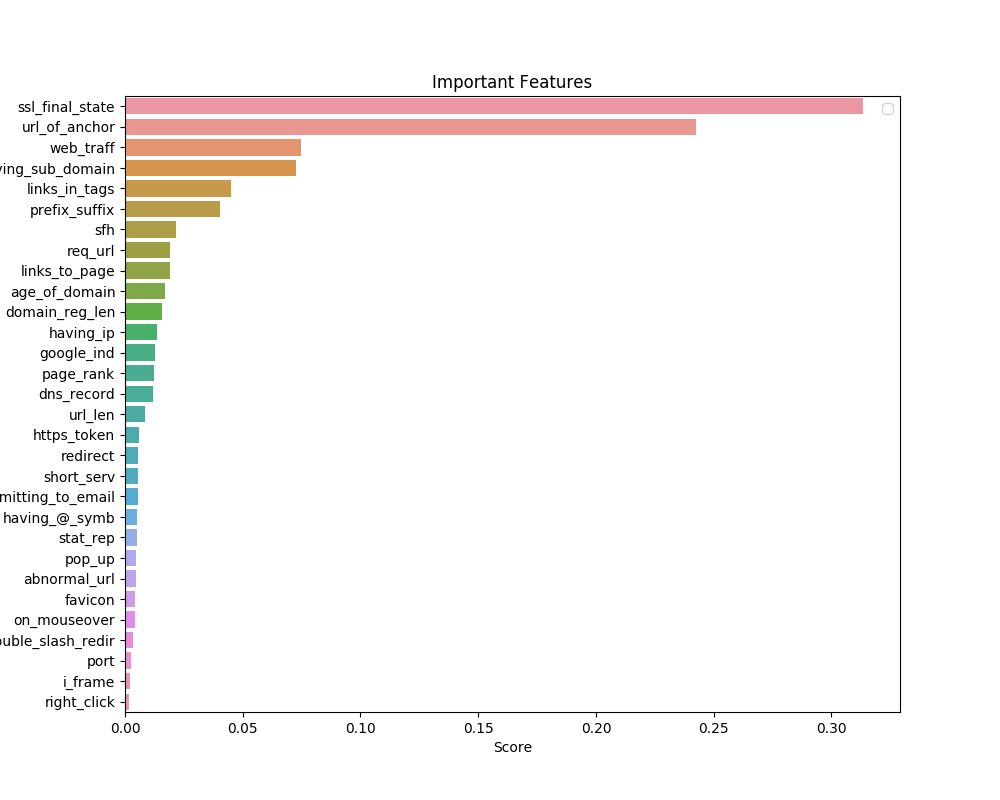

No handles with labels found to put in legend.


In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x=impfeats,y=impfeats.index)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()

In [26]:
Xn=df[['having_ip','url_len','short_serv','having_@_symb','prefix_suffix','having_sub_domain','ssl_final_state','domain_reg_len','https_token','req_url','url_of_anchor','links_in_tags','sfh','submitting_to_email','abnormal_url','redirect','pop_up','age_of_domain','dns_record','web_traff','page_rank','google_ind','links_to_page']]

In [27]:
yn=df['result']

In [28]:
Xn_train,Xn_test,yn_train,yn_test=train_test_split(Xn,yn,test_size=0.3)


In [29]:
classifn=RandomForestClassifier(n_estimators=110)

In [30]:
classifn.fit(Xn_train,yn_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
yn_pred=classifn.predict(Xn_test)

In [32]:
print("Accuracy with selected features ={} %".format((accuracy_score(yn_test,yn_pred)*100)))

Accuracy with selected features =96.7741935483871 %
